In [1]:
import sklearn.datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

breast_cancer_dataset = sklearn.datasets.load_breast_cancer()
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [2]:
data_frame['label'] = breast_cancer_dataset.target
data_frame.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


In [3]:
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [5]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [6]:
# importing libraries
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [7]:
# setting up the layers of neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)), # input layer
    keras.layers.Dense(20, activation='relu'), # hidden layer
    keras.layers.Dense(2, activation='sigmoid') # output layer

    
])

C:\Users\shive\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# compiling neural network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# training the neural network

history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6750 - loss: 0.6369 - val_accuracy: 0.8043 - val_loss: 0.4552
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8726 - loss: 0.4016 - val_accuracy: 0.8696 - val_loss: 0.3192
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9103 - loss: 0.2891 - val_accuracy: 0.9130 - val_loss: 0.2528
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9386 - loss: 0.2288 - val_accuracy: 0.9130 - val_loss: 0.2168
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9485 - loss: 0.1917 - val_accuracy: 0.9348 - val_loss: 0.1935
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9551 - loss: 0.1667 - val_accuracy: 0.9348 - val_loss: 0.1769
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9605 - loss: 0.1489 - val_accuracy: 0.9565 - val_loss: 0.1643
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9645 - loss: 0.1352 - val_accuracy: 0.9565 - val_loss

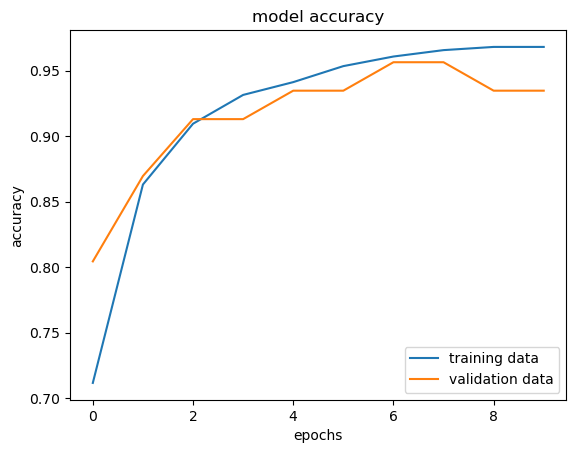

In [10]:
# Visualizing the accuracy and loss

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')

plt.legend(['training data', 'validation data'], loc='lower right')